In [ ]:
!pip install git+https://github.com/mimoralea/gym-walk


In [ ]:

from typing import Any
import warnings ; warnings.filterwarnings('ignore')

import gym, gym_walk
import numpy as np

import random
import warnings

warnings.filterwarnings('ignore', category=DeprecationWarning)
np.set_printoptions(suppress=True)
random.seed(123); np.random.seed(123)

# Reference https://github.com/mimoralea/gym-walk

In [ ]:
def print_policy(pi, P, action_symbols=('<', 'v', '>', '^'), n_cols=4, title='Policy:'):
    print(title)
    arrs = {k:v for k,v in enumerate(action_symbols)}
    for s in range(len(P)):
        a = pi(s)
        print("| ", end="")
        if np.all([done for action in P[s].values() for _, _, _, done in action]):
            print("".rjust(9), end=" ")
        else:
            print(str(s).zfill(2), arrs[a].rjust(6), end=" ")
        if (s + 1) % n_cols == 0: print("|")

In [ ]:
def print_state_value_function(V, P, n_cols=4, prec=3, title='State-value function:'):
    print(title)
    for s in range(len(P)):
        v = V[s]
        print("| ", end="")
        if np.all([done for action in P[s].values() for _, _, _, done in action]):
            print("".rjust(9), end=" ")
        else:
            print(str(s).zfill(2), '{}'.format(np.round(v, prec)).rjust(6), end=" ")
        if (s + 1) % n_cols == 0: print("|")

In [ ]:
def probability_success(env, pi, goal_state, n_episodes=100, max_steps=200):
    random.seed(123); np.random.seed(123) ; env.seed(123)
    results = []
    for _ in range(n_episodes):
        state, done, steps = env.reset(), False, 0
        while not done and steps < max_steps:
            state, _, done, h = env.step(pi(state))
            steps += 1
        results.append(state == goal_state)
    return np.sum(results)/len(results)

In [ ]:
def mean_return(env, pi, n_episodes=100, max_steps=200):
    random.seed(123); np.random.seed(123) ; env.seed(123)
    results = []
    for _ in range(n_episodes):
        state, done, steps = env.reset(), False, 0
        results.append(0.0)
        while not done and steps < max_steps:
            state, reward, done, _ = env.step(pi(state))
            results[-1] += reward
            steps += 1
    return np.mean(results)

# Slippery Walk Five MDP



In [ ]:
env = gym.make('SlipperyWalkFive-v0')
P = env.env.P
init_state = env.reset()
goal_state = 6
LEFT, RIGHT = range(2)

In [ ]:
P

In [ ]:
init_state

In [ ]:
state, reward, done, info = env.step(RIGHT)
print("state:{0} - reward:{1} - done:{2} - info:{3}".format(state, reward, done, info))

In [ ]:
# First Policy
pi_1 = lambda s: {
    0:LEFT, 1:LEFT, 2:LEFT, 3:LEFT, 4:LEFT, 5:LEFT, 6:LEFT
}[s]
print_policy(pi_1, P, action_symbols=('<', '>'), n_cols=7)

In [ ]:
# Find the probability of success and the mean return of the first policy
print('Reaches goal {:.2f}%. Obtains an average undiscounted return of {:.4f}.'.format(
    probability_success(env, pi_1, goal_state=goal_state)*100,
    mean_return(env, pi_1)))

In [ ]:
# Create your own policy

# Write your code here
pi_2 = lambda s: {
    0:RIGHT, 1:LEFT, 2:RIGHT, 3:LEFT, 4:RIGHT, 5:RIGHT, 6:RIGHT
}[s]
print_policy(pi_2, P, action_symbols=('<', '>'), n_cols=7)

In [ ]:
# Find the probability of success and the mean return of you your policy

#write your code here
print('Reaches goal {:.2f}%. Obtains an average undiscounted return of {:.4f}.'.format(
    probability_success(env, pi_2, goal_state=goal_state)*100,
    mean_return(env, pi_2)))


In [ ]:
# Compare your policy with the first policy


# Policy Evaluation

In [ ]:
from numpy.lib.function_base import copy
def policy_evaluation(pi, P, gamma=1.0, theta=1e-10):
    prev_V = np.zeros(len(P), dtype=np.float64)
    # Write your code here to evaluate the given policy
    while True:
      V=np.zeros(len(P),dtype=np.float64)
      for s in range(len(P)):
        for prob, next_state, reward, done in P[s][pi(s)]:
          V[s]+=prob*(reward+gamma+prev_V[next_state]*(not done))
      if np.max(np.abs(prev_V-V))<theta:
        break
      prev_V=V.copy()
      return V

In [ ]:
# Code to evaluate the first policy
V1 = policy_evaluation(pi_1, P,gamma=0.99)
print_state_value_function(V1, P, n_cols=7, prec=5)

In [ ]:
# Code to evaluate the second policy
# Write your code here
V2 = policy_evaluation(pi_2, P)
print_state_value_function(V2, P, n_cols=7, prec=5)

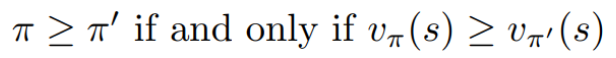

In [ ]:
# Comparing the two policies

# Compare the two policies based on the value function using the above equation and find the best policy

In [ ]:
V1

In [ ]:
print_state_value_function(V1, P, n_cols=7, prec=5)

In [ ]:
V2

In [ ]:
print_state_value_function(V2, P, n_cols=7, prec=5)

In [ ]:
V1>=V2

In [ ]:
if(np.sum(V1>=V2)==7):
  print("The first policy is the better policy")
elif(np.sum(V2>=V1)==7):
  print("The second policy is the better policy")
else:
  print("Both policies have their merits.")